In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
df = pd.read_csv("country_wise_latest.csv")

In [4]:
df.head()
df.info()
df.describe(include="all")
df.columns.tolist()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

['Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'New cases',
 'New deaths',
 'New recovered',
 'Deaths / 100 Cases',
 'Recovered / 100 Cases',
 'Deaths / 100 Recovered',
 'Confirmed last week',
 '1 week change',
 '1 week % increase',
 'WHO Region']

In [5]:
df = df.rename(columns={
    "Country/Region": "country",
    "New cases": "new_cases",
    "New deaths": "new_deaths",
    "New recovered": "new_recovered",
    "Deaths / 100 Cases": "deaths_per_100_cases",
    "Recovered / 100 Cases": "recovered_per_100_cases",
    "Deaths / 100 Recovered": "deaths_per_100_recovered",
    "Confirmed last week": "confirmed_last_week",
    "1 week change": "week_change",
    "1 week % increase": "week_pct_increase",
    "WHO Region": "who_region"
})

df.columns.tolist()


['country',
 'Confirmed',
 'Deaths',
 'Recovered',
 'Active',
 'new_cases',
 'new_deaths',
 'new_recovered',
 'deaths_per_100_cases',
 'recovered_per_100_cases',
 'deaths_per_100_recovered',
 'confirmed_last_week',
 'week_change',
 'week_pct_increase',
 'who_region']

In [6]:
df = df.rename(columns={
    "Confirmed": "confirmed",
    "Deaths": "deaths",
    "Recovered": "recovered",
    "Active": "active"
})

df.columns.tolist()


['country',
 'confirmed',
 'deaths',
 'recovered',
 'active',
 'new_cases',
 'new_deaths',
 'new_recovered',
 'deaths_per_100_cases',
 'recovered_per_100_cases',
 'deaths_per_100_recovered',
 'confirmed_last_week',
 'week_change',
 'week_pct_increase',
 'who_region']

In [11]:
df[["week_change", "week_pct_increase"]].describe()


,week_change,week_pct_increase
count,187.000000,187.000000
mean,9448.459893,13.606203
std,47491.127684,24.509838
min,-47.000000,-3.840000
25%,49.000000,2.775000
50%,432.000000,6.890000
75%,3172.000000,16.855000
max,455582.000000,226.320000


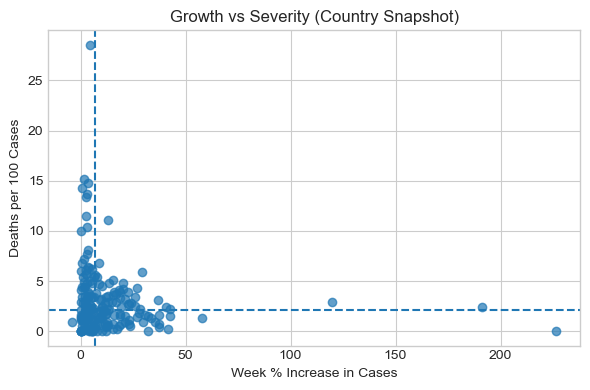

In [13]:
plt.figure(figsize=(6, 4))
plt.scatter(df["week_pct_increase"], df["deaths_per_100_cases"], alpha=0.7)
plt.axvline(df["week_pct_increase"].median(), linestyle="--")
plt.axhline(df["deaths_per_100_cases"].median(), linestyle="--")
plt.xlabel("Week % Increase in Cases")
plt.ylabel("Deaths per 100 Cases")
plt.title("Growth vs Severity (Country Snapshot)")
plt.tight_layout()
plt.show()


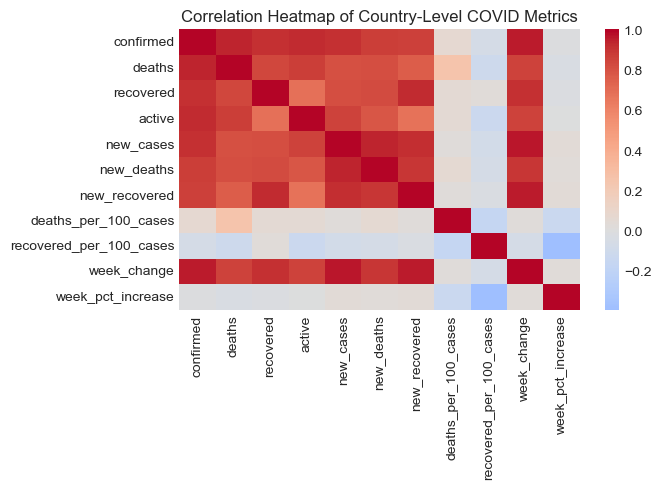

In [15]:
import seaborn as sns

cols = [
    "confirmed", "deaths", "recovered", "active",
    "new_cases", "new_deaths", "new_recovered",
    "deaths_per_100_cases", "recovered_per_100_cases",
    "week_change", "week_pct_increase"
]

corr = df[cols].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Country-Level COVID Metrics")
plt.tight_layout()
plt.show()


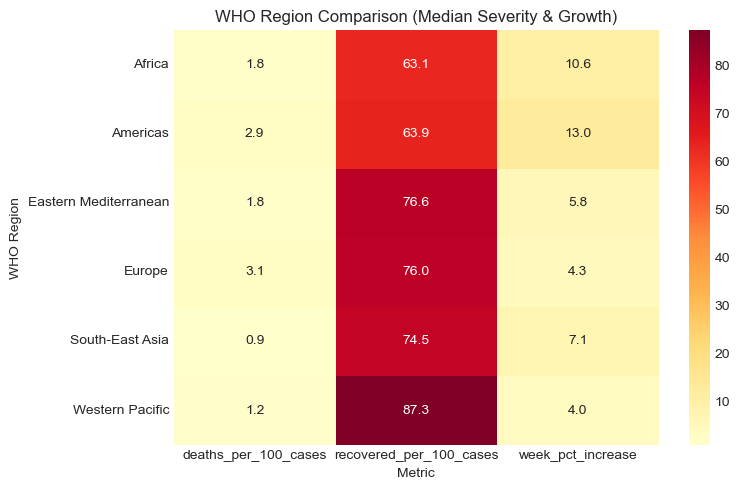

In [15]:
region_summary = (
    df.groupby("who_region")[[
        "deaths_per_100_cases",
        "recovered_per_100_cases",
        "week_pct_increase"
    ]]
    .median()   # median is robust to outliers
)

plt.figure(figsize=(8, 5))
sns.heatmap(region_summary, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("WHO Region Comparison (Median Severity & Growth)")
plt.xlabel("Metric")
plt.ylabel("WHO Region")
plt.tight_layout()
plt.show()


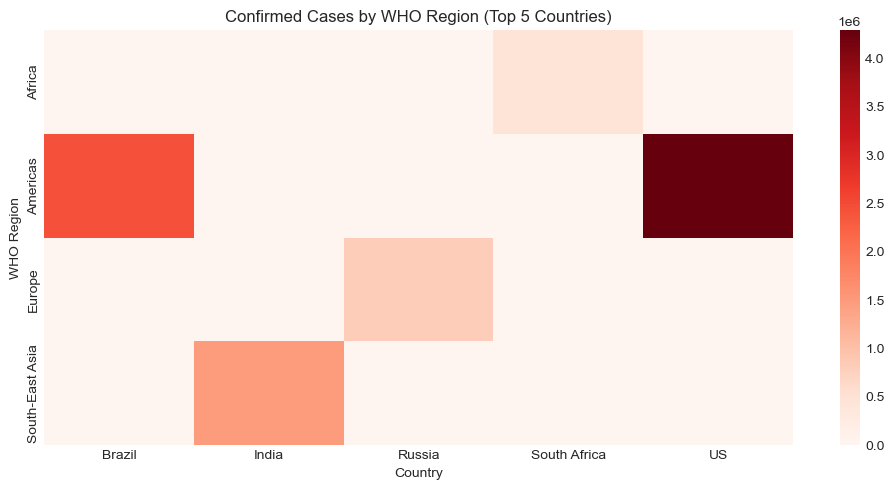

In [17]:
# pick top 5 countries by confirmed to keep it readable
top_countries = df.sort_values("confirmed", ascending=False).head(5)["country"]

matrix = (
    df[df["country"].isin(top_countries)]
      .pivot_table(index="who_region", columns="country", values="confirmed", aggfunc="sum", fill_value=0)
)

plt.figure(figsize=(10, 5))
sns.heatmap(matrix, cmap="Reds")
plt.title("Confirmed Cases by WHO Region (Top 5 Countries)")
plt.xlabel("Country")
plt.ylabel("WHO Region")
plt.tight_layout()
plt.show()
